# Notebook- Preprocessing & Fit : ModelK2
# Author : V.Albors   Date : 02.02.2020
# Purpose : Check learning Rates & Batch sizes


**Input** :  
  * CSV files that identify the images to use as train and validation. CSV files are in directory csv_dir   
  * Images from train and validation. Images are in directory : imag_dir  
  * Saved model. Model is in directory : model_bin_dir  
  
**Output**:  
  * Check accuracy and loss graphics for different learning rates (10^-2, 10^-3, 10^-4) with batch size = 128 and different batch sizes ( 32,64,128 ) with learning rate = 10^-4
  

**Process**:  
 * Load images 
 * Create model 
 * Compile model 
 * Train model for different learning rates &  different batch sizes 
 



In [1]:
#Eliminate warnings
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

tf.keras.backend.clear_session()  # Reset

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.config.experimental.list_physical_devices('GPU') 
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.debugging.set_log_device_placement(True)

Num GPUs Available:  1


In [4]:
#Tensorflow version 
print(tf.__version__)
from tensorflow.python.platform import build_info as tf_build_info
print(tf_build_info.cuda_version_number)
# Cuda Version 9.0 in v1.10.0
print(tf_build_info.cudnn_version_number)
# CudNN 7 in v1.10.0

2.0.0
10.0
7.6


In [5]:
# Define the name of the model, directories & if to train the model 
Model_directory = "MODELK2"
Model_name = "ModelK2_"
TRAIN = True

In [6]:
# Import routines
import sys  
subrc_dir = "/home/valborsf/Documents/UOC/PFMProject/"

sys.path.append(subrc_dir)  
from  Models_routines import *
import inspect

# List functions inside the module
import Models_routines as module
functions = inspect.getmembers(module, inspect.isfunction)
lsfunctions = [item[0] for item in functions]
print ( lsfunctions )

['confusion_ROC_AUC', 'create_column_tensor', 'create_label_tensor', 'create_val_test', 'define_dirs', 'extract_images_bm', 'extract_images_train', 'load_hist_model', 'load_images', 'load_images_tf', 'model_load', 'plot_save_acc_loss', 'print_network', 'process_clinical_info', 'read_dataframes', 'read_dataframes_tables', 'reproducible_results', 'save_model', 'save_network_json', 'start', 'stop', 'to_one_hot', 'to_one_hot_words', 'xi_squared']


In [7]:
# Reproducible results 
reproducible_results ()

In [8]:
# Define directories
(root_dir,json_dir,imag_dir,csv_dir,model_json_dir,model_bin_dir,results_dir,Tensor_dir) = define_dirs(Model_directory)

In [9]:
# New dataset without SONIC disturbing images
json_dir =  root_dir +"/DataNew/ALL_JSON/"                # .json dir images
imag_dir =  root_dir +"/DataNew/ALL_IMAGES/"              # .png dir - images

# directories for  CSV's
csv_dir =  root_dir +"/DataNew4/CSV/"                      # .csv dir - dftrain, dfval, dftest

In [10]:
# Load train,validation & Test 
(dftrain, dfval, dftest) = read_dataframes(csv_dir)

/home/valborsf/Documents/UOC/PFMProject/DataNew4/CSV/


In [11]:
# Define the label tensor
train_label_tensor = create_label_tensor(dftrain)
val_label_tensor = create_label_tensor(dfval)
#test_label_tensor = create_label_tensor(dftest)

In [12]:
# Create tensors from images
# Load Images 
height_imag = 150 
width_imag = 150
# This step is very time consuming !!!!!!!
train_image_tensor  = load_images_tf(dftrain,height_imag,width_imag)
val_image_tensor  = load_images_tf(dfval,height_imag,width_imag)
#test_image_tensor  = load_images(dftest,height_imag,width_imag)

(2100, 150, 150, 3)
(700, 150, 150, 3)


In [13]:
# Build Network 

from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint



def fit_model(lrate,bz,model_bin_dir, Model_name ):

    from tensorflow.keras.models import Model
    from tensorflow.keras import layers
    from tensorflow.keras import optimizers

    
    image_inputs = Input(shape=(height_imag,width_imag,3))
    m2 = layers.Conv2D(64, (3,3), activation='relu')(image_inputs)
    m2 = layers.MaxPooling2D((2,2))(m2)
    m2 = layers.Conv2D(32, (3,3),  activation='relu')(m2)
    m2 = layers.MaxPooling2D((2,2))(m2)
    m2 = layers.Conv2D(128, (3,3), activation='relu')(m2)
    m2 = layers.MaxPooling2D((2,2))(m2)
    m2 = layers.Flatten()(m2)
    m2 = layers.Dense (512, activation='relu')(m2)
    m2 = layers.Dropout(0.23)(m2)
    benign_malign = layers.Dense (1, activation='sigmoid')(m2)

    # Model instantiation
    model = Model(image_inputs, benign_malign)


    model.compile ( loss='binary_crossentropy',
               optimizer = optimizers.Adam(lr=lrate),
#                   optimizer = optimizers.RMSprop(lr=lrate),
               metrics= ['acc'])   
    
    
    
# Callbacks
    callbacks_list = [
# EarlyStopping when the model does not improve in loss

#         tf.keras.callbacks.EarlyStopping (
#             monitor = 'val_loss',             # Monitors the accuracy
#             verbose=1,                        # log when finishes
#             patience = 4,),                   # Interrupt if acc no improve in 4 epochs

#  ModelCheckpoint to store the weights of the best performing epoch. 
    
#         tf.keras.callbacks.ModelCheckpoint(filepath=model_bin_dir+"Best_weights"+Model_name+".hdf5", 
#             monitor = 'val_loss', # Won't overwritte the model file unless val_loss has
#             verbose=1,            # improve 
#             save_best_only=True),
         
#         keras.callbacks.TensorBoard(
#             log_dir =  Tensor_dir, 
#            histogram_freq = 1,
#            )
                ]
    
# Train model 



# Model fit
    epochs= 50

    import time
    start_time = time.time()
    history = model.fit (train_image_tensor, 
           train_label_tensor, 
           epochs = epochs, 
           batch_size = bz, 
           callbacks=callbacks_list,
           validation_data =( val_image_tensor,val_label_tensor))

    elapsed_time = time.time() - start_time

    print( time.strftime('Time spent in training :'"%H:%M:%S", time.gmtime(elapsed_time)))

# Save model & history
    

    save_model(model, history, model_bin_dir, Model_name)

   

In [15]:
# Test Learning rates
from time import time
#from keras import backend as K

#learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
learning_rates = [1E-2, 1E-3, 1E-4]
batch_size = 128
for i in range(len(learning_rates)):
# fit model and plot learning curves for a learning rate
    tf.keras.backend.clear_session()  # Reset
    start = time()
#    K.clear_session()
    Model_name = "ModelK2_"
    Model_name = Model_name+str(learning_rates[i])+'_'+str(batch_size)
    fit_model(learning_rates[i],batch_size, model_bin_dir, Model_name )
    
  

Train on 2100 samples, validate on 700 samples
Epoch 1/50
2100/2100 [==============================] - 5s 3ms/sample - loss: 6.7265 - acc: 0.5057 - val_loss: 0.6946 - val_acc: 0.4843
Epoch 2/50
2100/2100 [==============================] - 2s 962us/sample - loss: 0.6942 - acc: 0.4910 - val_loss: 0.6941 - val_acc: 0.4843
Epoch 3/50
2100/2100 [==============================] - 2s 975us/sample - loss: 0.6927 - acc: 0.4986 - val_loss: 0.6927 - val_acc: 0.5157
Epoch 4/50
2100/2100 [==============================] - 2s 989us/sample - loss: 0.6936 - acc: 0.5110 - val_loss: 0.6944 - val_acc: 0.4843
Epoch 5/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.6938 - acc: 0.4981 - val_loss: 0.6934 - val_acc: 0.4843
Epoch 6/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.6934 - acc: 0.4810 - val_loss: 0.6929 - val_acc: 0.5157
Epoch 7/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.6932 - acc: 0.4914 - val_loss: 0.6932 - val_acc: 0.

Epoch 18/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.4750 - acc: 0.7533 - val_loss: 0.4927 - val_acc: 0.7371
Epoch 19/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.4935 - acc: 0.7381 - val_loss: 0.4883 - val_acc: 0.7657
Epoch 20/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.4809 - acc: 0.7462 - val_loss: 0.5008 - val_acc: 0.7400
Epoch 21/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.4577 - acc: 0.7710 - val_loss: 0.4853 - val_acc: 0.7629
Epoch 22/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.4646 - acc: 0.7576 - val_loss: 0.4927 - val_acc: 0.7557
Epoch 23/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.4554 - acc: 0.7681 - val_loss: 0.4927 - val_acc: 0.7543
Epoch 24/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.4675 - acc: 0.7586 - val_loss: 0.5360 - val_acc: 0.7200
Epoch 25/50
2100/2100 [==================

Model with learning rate :  0.01


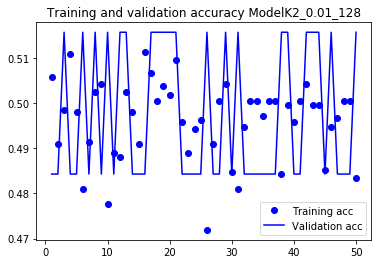

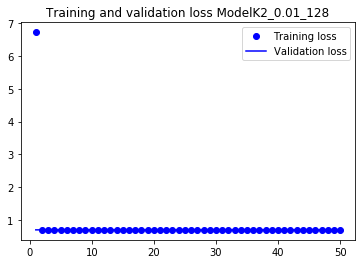

Model with learning rate :  0.001


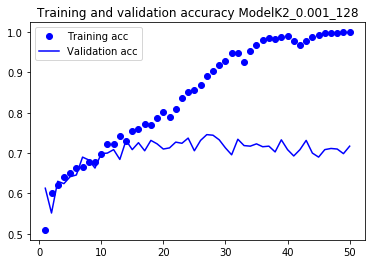

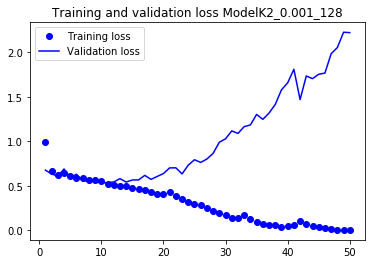

Model with learning rate :  0.0001


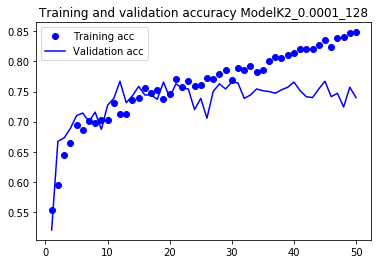

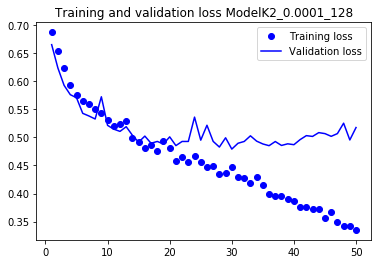

In [16]:
# Load Model history and Plot Acc and Loss for different learning rates

learning_rates = [1E-2, 1E-3, 1E-4]
batch_size = 128

for i in range(len(learning_rates)):
# load models 

    Model_name = "ModelK2_"
    Model_name = Model_name+str(learning_rates[i])+'_'+str(batch_size)
   
    
    history_dic = load_hist_model(model_bin_dir, Model_name)
    print ( "Model with learning rate : ", str(learning_rates[i]))
    plot_save_acc_loss(results_dir, history_dic, Model_name)

In [17]:
# Test Batch_sizes
from time import time
#from keras import backend as K

#learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
learning_rates = 1E-4
batch_size = [32,64,128]
for i in range(len(batch_size)):
# fit model and plot learning curves for a learning rate
    tf.keras.backend.clear_session()  # Reset
    start = time()
#    K.clear_session()
    Model_name = "ModelK2_"
    Model_name = Model_name+str(learning_rates)+'_'+str(batch_size[i])
    fit_model(learning_rates,batch_size[i], model_bin_dir, Model_name )
    
 

Train on 2100 samples, validate on 700 samples
Epoch 1/50
2100/2100 [==============================] - 4s 2ms/sample - loss: 0.6891 - acc: 0.5476 - val_loss: 0.6610 - val_acc: 0.5257
Epoch 2/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.6408 - acc: 0.6195 - val_loss: 0.6510 - val_acc: 0.6500
Epoch 3/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.6036 - acc: 0.6567 - val_loss: 0.6275 - val_acc: 0.5714
Epoch 4/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.5912 - acc: 0.6638 - val_loss: 0.6256 - val_acc: 0.5986
Epoch 5/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.5735 - acc: 0.6776 - val_loss: 0.5367 - val_acc: 0.7457
Epoch 6/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.5480 - acc: 0.6933 - val_loss: 0.5549 - val_acc: 0.6786
Epoch 7/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.5683 - acc: 0.6733 - val_loss: 0.5270 - val_acc: 0.7143
E

2100/2100 [==============================] - 2s 1ms/sample - loss: 0.5163 - acc: 0.7257 - val_loss: 0.5080 - val_acc: 0.7357
Epoch 11/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.4954 - acc: 0.7333 - val_loss: 0.4884 - val_acc: 0.7629
Epoch 12/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.4939 - acc: 0.7395 - val_loss: 0.5055 - val_acc: 0.7586
Epoch 13/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.4812 - acc: 0.7424 - val_loss: 0.4869 - val_acc: 0.7686
Epoch 14/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.4830 - acc: 0.7476 - val_loss: 0.4789 - val_acc: 0.7429
Epoch 15/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.4716 - acc: 0.7590 - val_loss: 0.5418 - val_acc: 0.6886
Epoch 16/50
2100/2100 [==============================] - 2s 1ms/sample - loss: 0.4754 - acc: 0.7552 - val_loss: 0.5131 - val_acc: 0.7200
Epoch 17/50
2100/2100 [==============================

Model with Batch Size :  32


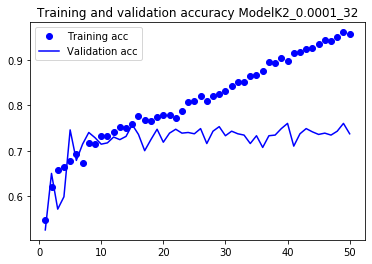

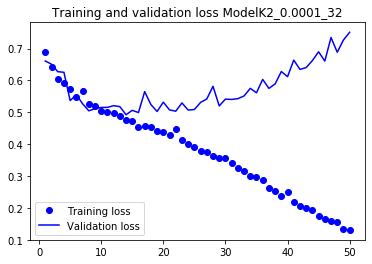

Model with Batch Size :  64


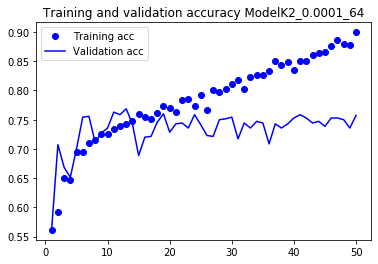

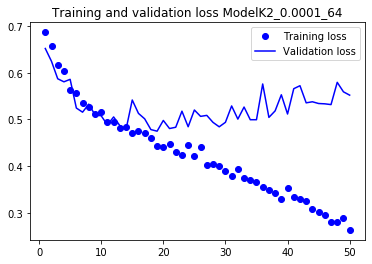

Model with Batch Size :  128


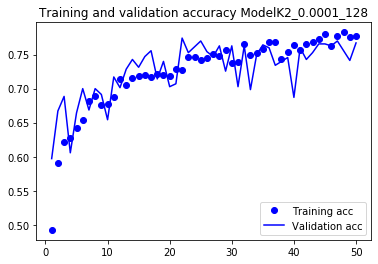

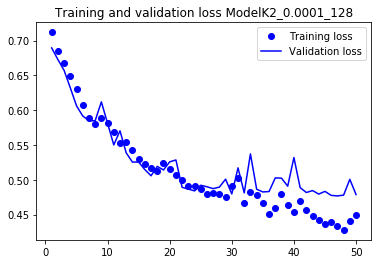

In [18]:
# Load Model history and Plot Acc and Loss for different Batch Sizes

learning_rates = 1E-4
batch_size = [32,64,128]


for i in range(len(batch_size)):
# load models 

    Model_name = "ModelK2_"
    Model_name = Model_name+str(learning_rates)+'_'+str(batch_size[i])
 
    
    history_dic = load_hist_model(model_bin_dir, Model_name)
    print ( "Model with Batch Size : ", str(batch_size[i]))
    plot_save_acc_loss(results_dir, history_dic, Model_name)